# Problem 1: Basics of Neural Networks
* <b>Learning Objective:</b> In the entrance exam, we asked you to implement a K-NN classifier to classify some tiny images extracted from CIFAR-10 dataset. Probably many of you noticed that the performances were quite bad. In this problem, you are going to implement a basic multi-layer fully connected neural network to perform the same classification task.
* <b>Provided Code:</b> We provide the skeletons of classes you need to complete. Forward checking and gradient checkings are provided for verifying your implementation as well.
* <b>TODOs:</b> You are asked to implement the forward passes and backward passes for standard layers and loss functions, various widely-used optimizers, and part of the training procedure. And finally we want you to train a network from scratch on your own.

In [116]:
from lib.fully_conn import *
from lib.layer_utils import *
from lib.grad_check import *
from lib.datasets import *
from lib.optim import *
from lib.train import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data (CIFAR-10)
Run the following code block to load in the properly splitted CIFAR-10 data.

In [117]:
data = CIFAR10_data()
for k, v in data.iteritems():
    print "Name: {} Shape: {}".format(k, v.shape)

Name: data_train Shape: (49000, 3, 32, 32)
Name: data_val Shape: (1000, 3, 32, 32)
Name: data_test Shape: (1000, 3, 32, 32)
Name: labels_train Shape: (49000,)
Name: labels_val Shape: (1000,)
Name: labels_test Shape: (1000,)


## Implement Standard Layers
You will now implement all the following standard layers commonly seen in a fully connected neural network. Please refer to the file layer_utils.py under the directory lib. Take a look at each class skeleton, and we will walk you through the network layer by layer. We provide results of some examples we pre-computed for you for checking the forward pass, and also the gradient checking for the backward pass.

## FC Forward
In the class skeleton "fc", please complete the forward pass in function "forward", the input to the fc layer may not be of dimension (batch size, features size), it could be an image or any higher dimensional data. Make sure that you handle this dimensionality issue. 

In [70]:
# Test the fc forward function
input_bz = 3
input_dim = (6, 5, 4)
output_dim = 4

input_size = input_bz * np.prod(input_dim)
weight_size = output_dim * np.prod(input_dim)

single_fc = fc(np.prod(input_dim), output_dim, init_scale=0.02, name="fc_test")

x = np.linspace(-0.1, 0.5, num=input_size).reshape(input_bz, *input_dim)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_dim), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

single_fc.params[single_fc.w_name] = w
single_fc.params[single_fc.b_name] = b

out = single_fc.forward(x)

correct_out = np.array([[0.70157129, 0.83483484, 0.96809839, 1.10136194],
                        [1.86723094, 2.02561647, 2.18400199, 2.34238752],
                        [3.0328906,  3.2163981,  3.3999056,  3.5834131]])

# Compare your output with the above pre-computed ones. 
# The difference should not be larger than 1e-8
print "Difference: ", rel_error(out, correct_out)

Difference:  2.485392759674788e-09


## FC Backward
Please complete the function "backward" as the backward pass of the fc layer. Follow the instructions in the comments to store gradients into the predefined dictionaries in the attributes of the class. Parameters of the layer are also stored in the predefined dictionary.

In [32]:
# Test the fc backward function
x = np.random.randn(10, 2, 2, 3)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(10, 10)

single_fc = fc(np.prod(x.shape[1:]), 10, init_scale=5e-2, name="fc_test")
single_fc.params[single_fc.w_name] = w
single_fc.params[single_fc.b_name] = b

dx_num = eval_numerical_gradient_array(lambda x: single_fc.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: single_fc.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: single_fc.forward(x), b, dout)

out = single_fc.forward(x)
dx = single_fc.backward(dout)
dw = single_fc.grads[single_fc.w_name]
db = single_fc.grads[single_fc.b_name]

print dx_num.shape
print dx.shape
print dw_num.shape
print dw.shape
print db_num.shape
print db.shape

# The error should be around 1e-10
print "dx Error: ", rel_error(dx_num, dx)
print "dw Error: ", rel_error(dw_num, dw)
print "db Error: ", rel_error(db_num, db)

(10, 2, 2, 3)
(10, 2, 2, 3)
(12, 10)
(12, 10)
(10,)
(10,)
dx Error:  9.361394506812859e-10
dw Error:  8.884347473063264e-10
db Error:  5.074792363899382e-11


## ReLU Forward
In the class skeleton "relu", please complete the forward pass.

In [33]:
# Test the relu forward function
x = np.linspace(-1.0, 1.0, num=12).reshape(3, 4)
relu_f = relu(name="relu_f")

out = relu_f.forward(x)

correct_out = np.array([[0.,          0.,        0.,         0.        ],
                        [0.,          0.,        0.09090909, 0.27272727],
                        [0.45454545, 0.63636364, 0.81818182, 1.        ]])

# Compare your output with the above pre-computed ones. 
# The difference should not be larger than 1e-8
print "Difference: ", rel_error(out, correct_out)

Difference:  5.000000050123796e-09


## ReLU Backward
Please complete the backward pass of the class relu.

In [34]:
# Test the relu backward function
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)
relu_b = relu(name="relu_b")

dx_num = eval_numerical_gradient_array(lambda x: relu_b.forward(x), x, dout)

out = relu_b.forward(x)
dx = relu_b.backward(dout)

# The error should not be larger than 1e-10
print "dx Error: ", rel_error(dx_num, dx)

dx Error:  3.2756244751759753e-12


## Dropout Forward
In the class "dropout", please complete the forward pass. Remember that the dropout is only applied during training phase, you should pay attention to this while implementing the function.

In [35]:
x = np.random.randn(100, 100) + 5.0

print "----------------------------------------------------------------"
for p in [0.25, 0.50, 0.75]:
    dropout_f = dropout(p)
    out = dropout_f.forward(x, True)
    out_test = dropout_f.forward(x, False)

    print "Dropout p = ", p
    print "Mean of input: ", x.mean()
    print "Mean of output during training time: ", out.mean()
    print "Mean of output during testing time: ", out_test.mean()
    print "Fraction of output set to zero during training time: ", (out == 0).mean()
    print "Fraction of output set to zero during testing time: ", (out_test == 0).mean()
    print "----------------------------------------------------------------"

----------------------------------------------------------------
Dropout p =  0.25
Mean of input:  4.995631421675257
Mean of output during training time:  1.2528526583236463
Mean of output during testing time:  4.995631421675257
Fraction of output set to zero during training time:  0.7494
Fraction of output set to zero during testing time:  0.0
----------------------------------------------------------------
Dropout p =  0.5
Mean of input:  4.995631421675257
Mean of output during training time:  2.4904757497767895
Mean of output during testing time:  4.995631421675257
Fraction of output set to zero during training time:  0.5018
Fraction of output set to zero during testing time:  0.0
----------------------------------------------------------------
Dropout p =  0.75
Mean of input:  4.995631421675257
Mean of output during training time:  3.768783741248381
Mean of output during testing time:  4.995631421675257
Fraction of output set to zero during training time:  0.2449
Fraction of output

## Dropout Backward
Please complete the backward pass. Again remember that the dropout is only applied during training phase, handle this in the backward pass as well.

In [36]:
x = np.random.randn(5, 5) + 5
dout = np.random.randn(*x.shape)

p = 0.75
dropout_b = dropout(p, seed=100)
out = dropout_b.forward(x, True)
dx = dropout_b.backward(dout)
dx_num = eval_numerical_gradient_array(lambda xx: dropout_b.forward(xx, True), x, dout)

# The error should not be larger than 1e-9
print 'dx relative error: ', rel_error(dx, dx_num)

dx relative error:  1.8928961546001812e-11


## Testing cascaded layers: FC + ReLU
Please find the TestFCReLU function in fully_conn.py under lib directory. <br />
You only need to complete few lines of code in the TODO block. <br />
Please design an FC --> ReLU two-layer-mini-network where the parameters of them match the given x, w, and b <br />
Please insert the corresponding names you defined for each layer to param_name_w, and param_name_b respectively. <br />
Here you only modify the param_name part, the _w, and _b are automatically assigned during network setup 

In [37]:
x = np.random.randn(2, 3, 4)  # the input features
w = np.random.randn(12, 10)   # the weight of fc layer
b = np.random.randn(10)       # the bias of fc layer
dout = np.random.randn(2, 10) # the gradients to the output, notice the shape

tiny_net = TestFCReLU()

tiny_net.net.assign("fc1_w", w)
tiny_net.net.assign("fc1_b", b)

out = tiny_net.forward(x)
dx = tiny_net.backward(dout)

dw = tiny_net.net.get_grads("fc1_w")
db = tiny_net.net.get_grads("fc1_b")

dx_num = eval_numerical_gradient_array(lambda x: tiny_net.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: tiny_net.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: tiny_net.forward(x), b, dout)

# The errors should not be larger than 1e-7
print "dx error: ", rel_error(dx_num, dx)
print "dw error: ", rel_error(dw_num, dw)
print "db error: ", rel_error(db_num, db)

dx error:  4.6047767656240917e-10
dw error:  1.3014199252124863e-10
db error:  3.2756170289757754e-12


## SoftMax Function and Loss Layer
In the layer_utils.py, please first complete the function softmax, which will be use in the function cross_entropy. Please refer to the lecture slides of the mathematical expressions of the cross entropy loss function, and complete its forward pass and backward pass.

In [38]:
num_classes, num_inputs = 5, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

test_loss = cross_entropy()

dx_num = eval_numerical_gradient(lambda x: test_loss.forward(x, y), x, verbose=False)

loss = test_loss.forward(x, y)
dx = test_loss.backward()

# Test softmax_loss function. Loss should be around 1.609
# and dx error should be at the scale of 1e-8 (or smaller)
print "Cross Entropy Loss: ", loss
print "dx error: ", rel_error(dx_num, dx)

Cross Entropy Loss:  1.609458464677557
dx error:  3.285990249894269e-09


## Test a Small Fully Connected Network
Please find the SmallFullyConnectedNetwork function in fully_conn.py under lib directory. <br />
Again you only need to complete few lines of code in the TODO block. <br />
Please design an FC --> ReLU --> FC --> ReLU network where the shapes of parameters match the given shapes <br />
Please insert the corresponding names you defined for each layer to param_name_w, and param_name_b respectively. <br />
Here you only modify the param_name part, the _w, and _b are automatically assigned during network setup 

In [39]:
model = SmallFullyConnectedNetwork()
loss_func = cross_entropy()

N, D, = 4, 4  # N: batch size, D: input dimension
H, C  = 30, 7 # H: hidden dimension, C: output dimension
std = 0.02
x = np.random.randn(N, D)
y = np.random.randint(C, size=N)

print "Testing initialization ... "
w1_std = abs(model.net.get_params("fc1_w").std() - std)
b1 = model.net.get_params("fc1_b").std()
w2_std = abs(model.net.get_params("fc2_w").std() - std)
b2 = model.net.get_params("fc2_b").std()

assert w1_std < std / 10, "First layer weights do not seem right"
assert np.all(b1 == 0), "First layer biases do not seem right"
assert w2_std < std / 10, "Second layer weights do not seem right"
assert np.all(b2 == 0), "Second layer biases do not seem right"
print "Passed!"

print "Testing test-time forward pass ... "
w1 = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
w2 = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
b1 = np.linspace(-0.1, 0.9, num=H)
b2 = np.linspace(-0.9, 0.1, num=C)

model.net.assign("fc1_w", w1)
model.net.assign("fc1_b", b1)
model.net.assign("fc2_w", w2)
model.net.assign("fc2_b", b2)

feats = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.forward(feats)
correct_scores = np.asarray([[4.20670862, 4.87188359, 5.53705856, 6.20223352, 6.86740849, 7.53258346, 8.19775843],
                             [4.74826036, 5.35984681, 5.97143326, 6.58301972, 7.19460617, 7.80619262, 8.41777907],
                             [5.2898121,  5.84781003, 6.40580797, 6.96380591, 7.52180384, 8.07980178, 8.63779971],
                             [5.83136384, 6.33577326, 6.84018268, 7.3445921,  7.84900151, 8.35341093, 8.85782035]])
scores_diff = np.sum(np.abs(scores - correct_scores))
assert scores_diff < 1e-6, "Your implementation might went wrong!"
print "Passed!"

print "Testing the loss ...",
y = np.asarray([0, 5, 1, 4])
loss = loss_func.forward(scores, y)
dLoss = loss_func.backward()
correct_loss = 2.90181552716
assert abs(loss - correct_loss) < 1e-10, "Your implementation might went wrong!"
print "Passed!"

print "Testing the gradients (error should be no larger than 1e-7) ..."
din = model.backward(dLoss)
for layer in model.net.layers:
    if not layer.params:
        continue
    for name in sorted(layer.grads):
        f = lambda _: loss_func.forward(model.forward(feats), y)
        grad_num = eval_numerical_gradient(f, layer.params[name], verbose=False)
        print '%s relative error: %.2e' % (name, rel_error(grad_num, layer.grads[name]))

Testing initialization ... 
Passed!
Testing test-time forward pass ... 
Passed!
Testing the loss ... Passed!
Testing the gradients (error should be no larger than 1e-7) ...
fc1_b relative error: 2.85e-09
fc1_w relative error: 5.01e-09
fc2_b relative error: 4.33e-07
fc2_w relative error: 2.76e-09


## Test a Fully Connected Network regularized with Dropout
Please find the DropoutNet function in fully_conn.py under lib directory. <br />
For this part you don't need to design a new network, just simply run the following test code <br />
If something goes wrong, you might want to double check your dropout implementation

In [40]:
N, D, C = 3, 15, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))
seed = 123

for dropout_p in [0., 0.25, 0.5]:
    print "Dropout p =", dropout_p
    model = DropoutNet(dropout_p=dropout_p, seed=seed)
    loss_func = cross_entropy()
    output = model.forward(X, True)
    loss = loss_func.forward(output, y)
    dLoss = loss_func.backward()
    dX = model.backward(dLoss)
    grads = model.net.grads
    print "Loss (should be ~2.30) : ", loss

    print "Error of gradients should be no larger than 1e-5"
    for name in sorted(model.net.params):
        f = lambda _: loss_func.forward(model.forward(X, True), y)
        grad_num = eval_numerical_gradient(f, model.net.params[name], verbose=False, h=1e-5)
        print "{} relative error: {}".format(name, rel_error(grad_num, grads[name]))
    print

Dropout p = 0.0
Loss (should be ~2.30) :  2.3025850929940455
Error of gradients should be no larger than 1e-5
fc1_b relative error: 0.0
fc1_w relative error: 0.0
fc2_b relative error: 0.0
fc2_w relative error: 0.0
fc3_b relative error: 0.0
fc3_w relative error: 0.0

Dropout p = 0.25
Loss (should be ~2.30) :  2.302596685860918
Error of gradients should be no larger than 1e-5
fc1_b relative error: 6.28835801155e-08
fc1_w relative error: 3.19420267916e-06
fc2_b relative error: 4.3790712705e-08
fc2_w relative error: 4.89500337318e-06
fc3_b relative error: 4.32061646493e-10
fc3_w relative error: 2.00387597884e-08

Dropout p = 0.5
Loss (should be ~2.30) :  2.3035088317763126
Error of gradients should be no larger than 1e-5
fc1_b relative error: 1.3676465955e-07
fc1_w relative error: 2.10078788437e-06
fc2_b relative error: 5.6554164989e-07
fc2_w relative error: 8.32295727183e-05
fc3_b relative error: 2.6061795162e-10
fc3_w relative error: 3.23726968314e-07



## Training a Network
In this section, we defined a TinyNet class for you to fill in the TODO block in fully_conn.py.
* Here please design a two layer fully connected network for this part.
* Please read the train.py under lib directory carefully and complete the TODO blocks in the train_net function first.
* In addition, read how the SGD function is implemented in optim.py, you will be asked to complete three other optimization methods in the later sections.

In [249]:
# Arrange the data
data_dict = {
    "data_train": (data["data_train"], data["labels_train"]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

In [273]:
model = TinyNet()
loss_f = cross_entropy()
optimizer = SGD(model.net, 1e-4)

### Now train the network to achieve at least 50% validation accuracy

In [274]:
results = None
#############################################################################
# TODO: Use the train_net function you completed to train a network         #
#############################################################################
results = train_net(data_dict, model, loss_f, optimizer, 500, 500, verbose=True)
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################
opt_params, loss_hist, train_acc_hist, val_acc_hist = results

(Iteration 1 / 49000) loss: 20.5314490381
(Iteration 11 / 49000) loss: 12.3946824624
(Iteration 21 / 49000) loss: 10.2958543512
(Iteration 31 / 49000) loss: 9.90443170342
(Iteration 41 / 49000) loss: 8.3509769735
(Iteration 51 / 49000) loss: 8.16887984032
(Iteration 61 / 49000) loss: 7.67814459131
(Iteration 71 / 49000) loss: 7.8981497033
(Iteration 81 / 49000) loss: 7.37788972838
(Iteration 91 / 49000) loss: 6.43558703172
(Epoch 1 / 500) Training Accuracy: 0.242387755102, Validation Accuracy: 0.244
(Iteration 101 / 49000) loss: 6.3959914497
(Iteration 111 / 49000) loss: 5.88924744308
(Iteration 121 / 49000) loss: 6.64528777199
(Iteration 131 / 49000) loss: 5.81271177765
(Iteration 141 / 49000) loss: 5.69307233818
(Iteration 151 / 49000) loss: 5.91306052648
(Iteration 161 / 49000) loss: 5.23652011975
(Iteration 171 / 49000) loss: 5.74429239124
(Iteration 181 / 49000) loss: 5.36593824899
(Iteration 191 / 49000) loss: 5.0073690885
(Epoch 2 / 500) Training Accuracy: 0.273367346939, Valida

(Iteration 1581 / 49000) loss: 1.74913225032
(Iteration 1591 / 49000) loss: 1.65560973074
(Iteration 1601 / 49000) loss: 1.7399291327
(Iteration 1611 / 49000) loss: 1.68257457608
(Iteration 1621 / 49000) loss: 1.66323639231
(Iteration 1631 / 49000) loss: 1.74559849486
(Iteration 1641 / 49000) loss: 1.82477815606
(Iteration 1651 / 49000) loss: 1.81312330478
(Iteration 1661 / 49000) loss: 1.58573066016
(Epoch 17 / 500) Training Accuracy: 0.410489795918, Validation Accuracy: 0.38
(Iteration 1671 / 49000) loss: 1.76187671804
(Iteration 1681 / 49000) loss: 1.69475110067
(Iteration 1691 / 49000) loss: 1.70033446171
(Iteration 1701 / 49000) loss: 1.69566218869
(Iteration 1711 / 49000) loss: 1.66432450241
(Iteration 1721 / 49000) loss: 1.76275382329
(Iteration 1731 / 49000) loss: 1.70149604335
(Iteration 1741 / 49000) loss: 1.58955278188
(Iteration 1751 / 49000) loss: 1.57250772257
(Iteration 1761 / 49000) loss: 1.70819851789
(Epoch 18 / 500) Training Accuracy: 0.415346938776, Validation Accur

(Iteration 3151 / 49000) loss: 1.62555446843
(Iteration 3161 / 49000) loss: 1.62942600824
(Iteration 3171 / 49000) loss: 1.63114770214
(Iteration 3181 / 49000) loss: 1.61046136342
(Iteration 3191 / 49000) loss: 1.62761120655
(Iteration 3201 / 49000) loss: 1.67535594323
(Iteration 3211 / 49000) loss: 1.56434695695
(Iteration 3221 / 49000) loss: 1.58624937779
(Iteration 3231 / 49000) loss: 1.67035214809
(Epoch 33 / 500) Training Accuracy: 0.430775510204, Validation Accuracy: 0.403
(Iteration 3241 / 49000) loss: 1.50755398362
(Iteration 3251 / 49000) loss: 1.58387900829
(Iteration 3261 / 49000) loss: 1.60480916237
(Iteration 3271 / 49000) loss: 1.56382908621
(Iteration 3281 / 49000) loss: 1.64280230146
(Iteration 3291 / 49000) loss: 1.58843124359
(Iteration 3301 / 49000) loss: 1.56540509347
(Iteration 3311 / 49000) loss: 1.67794219433
(Iteration 3321 / 49000) loss: 1.62667640509
(Iteration 3331 / 49000) loss: 1.65453243744
(Epoch 34 / 500) Training Accuracy: 0.431408163265, Validation Acc

(Iteration 4711 / 49000) loss: 1.47628904646
(Iteration 4721 / 49000) loss: 1.51919002122
(Iteration 4731 / 49000) loss: 1.58820833921
(Iteration 4741 / 49000) loss: 1.57134106183
(Iteration 4751 / 49000) loss: 1.55719522495
(Iteration 4761 / 49000) loss: 1.57777032507
(Iteration 4771 / 49000) loss: 1.64577191073
(Iteration 4781 / 49000) loss: 1.58999704805
(Iteration 4791 / 49000) loss: 1.51347429969
(Iteration 4801 / 49000) loss: 1.61997117798
(Epoch 49 / 500) Training Accuracy: 0.441020408163, Validation Accuracy: 0.407
(Iteration 4811 / 49000) loss: 1.66853268455
(Iteration 4821 / 49000) loss: 1.62125643636
(Iteration 4831 / 49000) loss: 1.62536967274
(Iteration 4841 / 49000) loss: 1.55326308762
(Iteration 4851 / 49000) loss: 1.50160210045
(Iteration 4861 / 49000) loss: 1.59659891619
(Iteration 4871 / 49000) loss: 1.64366493256
(Iteration 4881 / 49000) loss: 1.54058737926
(Iteration 4891 / 49000) loss: 1.6704821826
(Epoch 50 / 500) Training Accuracy: 0.445102040816, Validation Accu

(Epoch 64 / 500) Training Accuracy: 0.457387755102, Validation Accuracy: 0.431
(Iteration 6281 / 49000) loss: 1.64930749367
(Iteration 6291 / 49000) loss: 1.58480095766
(Iteration 6301 / 49000) loss: 1.59335207146
(Iteration 6311 / 49000) loss: 1.53421700117
(Iteration 6321 / 49000) loss: 1.47618186633
(Iteration 6331 / 49000) loss: 1.59620500521
(Iteration 6341 / 49000) loss: 1.61629792764
(Iteration 6351 / 49000) loss: 1.63741914668
(Iteration 6361 / 49000) loss: 1.62567525628
(Epoch 65 / 500) Training Accuracy: 0.458204081633, Validation Accuracy: 0.43
(Iteration 6371 / 49000) loss: 1.58843245832
(Iteration 6381 / 49000) loss: 1.62502920746
(Iteration 6391 / 49000) loss: 1.65281168778
(Iteration 6401 / 49000) loss: 1.59922402976
(Iteration 6411 / 49000) loss: 1.54046350628
(Iteration 6421 / 49000) loss: 1.63960665351
(Iteration 6431 / 49000) loss: 1.62477494389
(Iteration 6441 / 49000) loss: 1.58237210702
(Iteration 6451 / 49000) loss: 1.51381922182
(Iteration 6461 / 49000) loss: 1.

(Iteration 7831 / 49000) loss: 1.46741594685
(Epoch 80 / 500) Training Accuracy: 0.463428571429, Validation Accuracy: 0.426
(Iteration 7841 / 49000) loss: 1.45773546684
(Iteration 7851 / 49000) loss: 1.56411167117
(Iteration 7861 / 49000) loss: 1.55062403044
(Iteration 7871 / 49000) loss: 1.51242694143
(Iteration 7881 / 49000) loss: 1.46557080879
(Iteration 7891 / 49000) loss: 1.62119763287
(Iteration 7901 / 49000) loss: 1.50453755173
(Iteration 7911 / 49000) loss: 1.5240585302
(Iteration 7921 / 49000) loss: 1.56085559797
(Iteration 7931 / 49000) loss: 1.499406565
(Epoch 81 / 500) Training Accuracy: 0.464224489796, Validation Accuracy: 0.425
(Iteration 7941 / 49000) loss: 1.54963029323
(Iteration 7951 / 49000) loss: 1.63855371177
(Iteration 7961 / 49000) loss: 1.52369458487
(Iteration 7971 / 49000) loss: 1.5412279466
(Iteration 7981 / 49000) loss: 1.51559678956
(Iteration 7991 / 49000) loss: 1.4971645337
(Iteration 8001 / 49000) loss: 1.45735695756
(Iteration 8011 / 49000) loss: 1.6039

(Iteration 9381 / 49000) loss: 1.47436776681
(Iteration 9391 / 49000) loss: 1.56522124323
(Iteration 9401 / 49000) loss: 1.51111042674
(Epoch 96 / 500) Training Accuracy: 0.470857142857, Validation Accuracy: 0.439
(Iteration 9411 / 49000) loss: 1.4648141116
(Iteration 9421 / 49000) loss: 1.43393844678
(Iteration 9431 / 49000) loss: 1.47371638521
(Iteration 9441 / 49000) loss: 1.50724877505
(Iteration 9451 / 49000) loss: 1.3556221856
(Iteration 9461 / 49000) loss: 1.57137194608
(Iteration 9471 / 49000) loss: 1.53454005699
(Iteration 9481 / 49000) loss: 1.54036358215
(Iteration 9491 / 49000) loss: 1.55554374056
(Iteration 9501 / 49000) loss: 1.45897570312
(Epoch 97 / 500) Training Accuracy: 0.471244897959, Validation Accuracy: 0.445
(Iteration 9511 / 49000) loss: 1.52463090832
(Iteration 9521 / 49000) loss: 1.51033089247
(Iteration 9531 / 49000) loss: 1.55873895079
(Iteration 9541 / 49000) loss: 1.47826097782
(Iteration 9551 / 49000) loss: 1.57977273786
(Iteration 9561 / 49000) loss: 1.4

(Iteration 10911 / 49000) loss: 1.42813312656
(Iteration 10921 / 49000) loss: 1.53293781633
(Iteration 10931 / 49000) loss: 1.5675422211
(Iteration 10941 / 49000) loss: 1.47445847069
(Iteration 10951 / 49000) loss: 1.45214625018
(Iteration 10961 / 49000) loss: 1.55191358411
(Iteration 10971 / 49000) loss: 1.55907063389
(Epoch 112 / 500) Training Accuracy: 0.472918367347, Validation Accuracy: 0.438
(Iteration 10981 / 49000) loss: 1.57443456187
(Iteration 10991 / 49000) loss: 1.52086545534
(Iteration 11001 / 49000) loss: 1.43444311355
(Iteration 11011 / 49000) loss: 1.54691853168
(Iteration 11021 / 49000) loss: 1.53725496309
(Iteration 11031 / 49000) loss: 1.46223314138
(Iteration 11041 / 49000) loss: 1.55270212091
(Iteration 11051 / 49000) loss: 1.50926744238
(Iteration 11061 / 49000) loss: 1.52715474197
(Iteration 11071 / 49000) loss: 1.49253345481
(Epoch 113 / 500) Training Accuracy: 0.477142857143, Validation Accuracy: 0.45
(Iteration 11081 / 49000) loss: 1.49693615615
(Iteration 110

(Iteration 12441 / 49000) loss: 1.48643780444
(Epoch 127 / 500) Training Accuracy: 0.478326530612, Validation Accuracy: 0.436
(Iteration 12451 / 49000) loss: 1.42670459894
(Iteration 12461 / 49000) loss: 1.43494843171
(Iteration 12471 / 49000) loss: 1.44269165198
(Iteration 12481 / 49000) loss: 1.56329364405
(Iteration 12491 / 49000) loss: 1.44430210887
(Iteration 12501 / 49000) loss: 1.41138355331
(Iteration 12511 / 49000) loss: 1.5094465245
(Iteration 12521 / 49000) loss: 1.47791179917
(Iteration 12531 / 49000) loss: 1.44931920677
(Iteration 12541 / 49000) loss: 1.39626696574
(Epoch 128 / 500) Training Accuracy: 0.486448979592, Validation Accuracy: 0.445
(Iteration 12551 / 49000) loss: 1.53426580008
(Iteration 12561 / 49000) loss: 1.50470903146
(Iteration 12571 / 49000) loss: 1.50057917949
(Iteration 12581 / 49000) loss: 1.55620048639
(Iteration 12591 / 49000) loss: 1.54673289622
(Iteration 12601 / 49000) loss: 1.44917810928
(Iteration 12611 / 49000) loss: 1.53370267828
(Iteration 12

(Iteration 13951 / 49000) loss: 1.45171713178
(Iteration 13961 / 49000) loss: 1.40449778594
(Iteration 13971 / 49000) loss: 1.51053865058
(Iteration 13981 / 49000) loss: 1.52231559223
(Iteration 13991 / 49000) loss: 1.49409532472
(Iteration 14001 / 49000) loss: 1.38422909863
(Iteration 14011 / 49000) loss: 1.45829297136
(Epoch 143 / 500) Training Accuracy: 0.489530612245, Validation Accuracy: 0.44
(Iteration 14021 / 49000) loss: 1.43810735182
(Iteration 14031 / 49000) loss: 1.47591885081
(Iteration 14041 / 49000) loss: 1.4811464164
(Iteration 14051 / 49000) loss: 1.48121820176
(Iteration 14061 / 49000) loss: 1.44679680212
(Iteration 14071 / 49000) loss: 1.46594065805
(Iteration 14081 / 49000) loss: 1.5023407814
(Iteration 14091 / 49000) loss: 1.4647015889
(Iteration 14101 / 49000) loss: 1.48696165297
(Iteration 14111 / 49000) loss: 1.45739600541
(Epoch 144 / 500) Training Accuracy: 0.490836734694, Validation Accuracy: 0.453
(Iteration 14121 / 49000) loss: 1.47326406575
(Iteration 14131

(Iteration 15481 / 49000) loss: 1.45095884815
(Epoch 158 / 500) Training Accuracy: 0.481714285714, Validation Accuracy: 0.432
(Iteration 15491 / 49000) loss: 1.4273621915
(Iteration 15501 / 49000) loss: 1.58553778034
(Iteration 15511 / 49000) loss: 1.49182146873
(Iteration 15521 / 49000) loss: 1.57759488174
(Iteration 15531 / 49000) loss: 1.5161868999
(Iteration 15541 / 49000) loss: 1.39710390873
(Iteration 15551 / 49000) loss: 1.45506215272
(Iteration 15561 / 49000) loss: 1.44736209268
(Iteration 15571 / 49000) loss: 1.45577557455
(Iteration 15581 / 49000) loss: 1.52535840457
(Epoch 159 / 500) Training Accuracy: 0.490959183673, Validation Accuracy: 0.447
(Iteration 15591 / 49000) loss: 1.51277727081
(Iteration 15601 / 49000) loss: 1.49930924498
(Iteration 15611 / 49000) loss: 1.33841019767
(Iteration 15621 / 49000) loss: 1.45678544829
(Iteration 15631 / 49000) loss: 1.56242288247
(Iteration 15641 / 49000) loss: 1.42229585227
(Iteration 15651 / 49000) loss: 1.43945610801
(Iteration 156

(Iteration 16991 / 49000) loss: 1.44151651268
(Iteration 17001 / 49000) loss: 1.48899911061
(Iteration 17011 / 49000) loss: 1.44678674292
(Iteration 17021 / 49000) loss: 1.50920375379
(Iteration 17031 / 49000) loss: 1.4356373994
(Iteration 17041 / 49000) loss: 1.44297023045
(Iteration 17051 / 49000) loss: 1.43817914062
(Epoch 174 / 500) Training Accuracy: 0.494469387755, Validation Accuracy: 0.445
(Iteration 17061 / 49000) loss: 1.43842486322
(Iteration 17071 / 49000) loss: 1.54683202853
(Iteration 17081 / 49000) loss: 1.45072505011
(Iteration 17091 / 49000) loss: 1.40000729902
(Iteration 17101 / 49000) loss: 1.36549107832
(Iteration 17111 / 49000) loss: 1.51426409787
(Iteration 17121 / 49000) loss: 1.38039428665
(Iteration 17131 / 49000) loss: 1.44384514149
(Iteration 17141 / 49000) loss: 1.36559190751
(Epoch 175 / 500) Training Accuracy: 0.499102040816, Validation Accuracy: 0.457
(Iteration 17151 / 49000) loss: 1.41557320166
(Iteration 17161 / 49000) loss: 1.38543211445
(Iteration 17

(Iteration 18521 / 49000) loss: 1.41488727194
(Epoch 189 / 500) Training Accuracy: 0.500469387755, Validation Accuracy: 0.454
(Iteration 18531 / 49000) loss: 1.41479143521
(Iteration 18541 / 49000) loss: 1.33909428582
(Iteration 18551 / 49000) loss: 1.45571506943
(Iteration 18561 / 49000) loss: 1.55650982797
(Iteration 18571 / 49000) loss: 1.41177975769
(Iteration 18581 / 49000) loss: 1.41128190873
(Iteration 18591 / 49000) loss: 1.41219482777
(Iteration 18601 / 49000) loss: 1.49514232665
(Iteration 18611 / 49000) loss: 1.46026050723
(Epoch 190 / 500) Training Accuracy: 0.498734693878, Validation Accuracy: 0.452
(Iteration 18621 / 49000) loss: 1.41028734172
(Iteration 18631 / 49000) loss: 1.43231561716
(Iteration 18641 / 49000) loss: 1.52816664268
(Iteration 18651 / 49000) loss: 1.44889315319
(Iteration 18661 / 49000) loss: 1.47392546889
(Iteration 18671 / 49000) loss: 1.48896780349
(Iteration 18681 / 49000) loss: 1.38113684658
(Iteration 18691 / 49000) loss: 1.46012323212
(Iteration 1

(Iteration 20031 / 49000) loss: 1.38313445526
(Iteration 20041 / 49000) loss: 1.41157534938
(Iteration 20051 / 49000) loss: 1.38315929274
(Iteration 20061 / 49000) loss: 1.34617178267
(Iteration 20071 / 49000) loss: 1.4123857225
(Iteration 20081 / 49000) loss: 1.42524599184
(Epoch 205 / 500) Training Accuracy: 0.509693877551, Validation Accuracy: 0.462
(Iteration 20091 / 49000) loss: 1.43176327266
(Iteration 20101 / 49000) loss: 1.33503621249
(Iteration 20111 / 49000) loss: 1.32928680357
(Iteration 20121 / 49000) loss: 1.37529772895
(Iteration 20131 / 49000) loss: 1.44819395512
(Iteration 20141 / 49000) loss: 1.45491551231
(Iteration 20151 / 49000) loss: 1.42191370352
(Iteration 20161 / 49000) loss: 1.38689117618
(Iteration 20171 / 49000) loss: 1.35929561602
(Iteration 20181 / 49000) loss: 1.38870365123
(Epoch 206 / 500) Training Accuracy: 0.507428571429, Validation Accuracy: 0.459
(Iteration 20191 / 49000) loss: 1.4269145779
(Iteration 20201 / 49000) loss: 1.52617429577
(Iteration 202

(Epoch 220 / 500) Training Accuracy: 0.509142857143, Validation Accuracy: 0.459
(Iteration 21561 / 49000) loss: 1.42394679516
(Iteration 21571 / 49000) loss: 1.44439296199
(Iteration 21581 / 49000) loss: 1.45726395788
(Iteration 21591 / 49000) loss: 1.30447904224
(Iteration 21601 / 49000) loss: 1.38194353898
(Iteration 21611 / 49000) loss: 1.39000901016
(Iteration 21621 / 49000) loss: 1.50712226211
(Iteration 21631 / 49000) loss: 1.46017720355
(Iteration 21641 / 49000) loss: 1.40115884576
(Iteration 21651 / 49000) loss: 1.36040056091
(Epoch 221 / 500) Training Accuracy: 0.513836734694, Validation Accuracy: 0.464
(Iteration 21661 / 49000) loss: 1.38272181438
(Iteration 21671 / 49000) loss: 1.39657077623
(Iteration 21681 / 49000) loss: 1.53064472118
(Iteration 21691 / 49000) loss: 1.39272736986
(Iteration 21701 / 49000) loss: 1.4245111203
(Iteration 21711 / 49000) loss: 1.44922021831
(Iteration 21721 / 49000) loss: 1.41126154097
(Iteration 21731 / 49000) loss: 1.36802834823
(Iteration 21

(Iteration 23071 / 49000) loss: 1.41425280408
(Iteration 23081 / 49000) loss: 1.42037502253
(Iteration 23091 / 49000) loss: 1.47737463067
(Iteration 23101 / 49000) loss: 1.45527719163
(Iteration 23111 / 49000) loss: 1.4059703315
(Iteration 23121 / 49000) loss: 1.39802905996
(Epoch 236 / 500) Training Accuracy: 0.512897959184, Validation Accuracy: 0.465
(Iteration 23131 / 49000) loss: 1.38492823018
(Iteration 23141 / 49000) loss: 1.37910161738
(Iteration 23151 / 49000) loss: 1.38393272186
(Iteration 23161 / 49000) loss: 1.39484262981
(Iteration 23171 / 49000) loss: 1.33708012801
(Iteration 23181 / 49000) loss: 1.35998642182
(Iteration 23191 / 49000) loss: 1.43718164592
(Iteration 23201 / 49000) loss: 1.43812207837
(Iteration 23211 / 49000) loss: 1.37232367985
(Iteration 23221 / 49000) loss: 1.52746130965
(Epoch 237 / 500) Training Accuracy: 0.516285714286, Validation Accuracy: 0.461
(Iteration 23231 / 49000) loss: 1.33501056256
(Iteration 23241 / 49000) loss: 1.43573738031
(Iteration 23

(Epoch 251 / 500) Training Accuracy: 0.518979591837, Validation Accuracy: 0.457
(Iteration 24601 / 49000) loss: 1.40440291525
(Iteration 24611 / 49000) loss: 1.34064922005
(Iteration 24621 / 49000) loss: 1.41131813944
(Iteration 24631 / 49000) loss: 1.38146656677
(Iteration 24641 / 49000) loss: 1.39125220624
(Iteration 24651 / 49000) loss: 1.45062107244
(Iteration 24661 / 49000) loss: 1.28909641694
(Iteration 24671 / 49000) loss: 1.34660099716
(Iteration 24681 / 49000) loss: 1.25045870973
(Iteration 24691 / 49000) loss: 1.41946603914
(Epoch 252 / 500) Training Accuracy: 0.516244897959, Validation Accuracy: 0.458
(Iteration 24701 / 49000) loss: 1.31420992034
(Iteration 24711 / 49000) loss: 1.37439511867
(Iteration 24721 / 49000) loss: 1.33412662734
(Iteration 24731 / 49000) loss: 1.34445304672
(Iteration 24741 / 49000) loss: 1.4007896176
(Iteration 24751 / 49000) loss: 1.40216059873
(Iteration 24761 / 49000) loss: 1.34556511855
(Iteration 24771 / 49000) loss: 1.34976804292
(Iteration 24

(Iteration 26111 / 49000) loss: 1.44428715899
(Iteration 26121 / 49000) loss: 1.40261433629
(Iteration 26131 / 49000) loss: 1.35990617858
(Iteration 26141 / 49000) loss: 1.40329750199
(Iteration 26151 / 49000) loss: 1.45634092287
(Iteration 26161 / 49000) loss: 1.43549599602
(Epoch 267 / 500) Training Accuracy: 0.522897959184, Validation Accuracy: 0.459
(Iteration 26171 / 49000) loss: 1.34356250881
(Iteration 26181 / 49000) loss: 1.30263838833
(Iteration 26191 / 49000) loss: 1.31437046576
(Iteration 26201 / 49000) loss: 1.42171154056
(Iteration 26211 / 49000) loss: 1.38388680209
(Iteration 26221 / 49000) loss: 1.39444289874
(Iteration 26231 / 49000) loss: 1.38470864926
(Iteration 26241 / 49000) loss: 1.47220297645
(Iteration 26251 / 49000) loss: 1.40039534501
(Iteration 26261 / 49000) loss: 1.37058752353
(Epoch 268 / 500) Training Accuracy: 0.515326530612, Validation Accuracy: 0.452
(Iteration 26271 / 49000) loss: 1.36400443555
(Iteration 26281 / 49000) loss: 1.36134733577
(Iteration 2

(Epoch 282 / 500) Training Accuracy: 0.521591836735, Validation Accuracy: 0.459
(Iteration 27641 / 49000) loss: 1.42784570298
(Iteration 27651 / 49000) loss: 1.31671969431
(Iteration 27661 / 49000) loss: 1.39747712907
(Iteration 27671 / 49000) loss: 1.40725510947
(Iteration 27681 / 49000) loss: 1.4068982952
(Iteration 27691 / 49000) loss: 1.36860566751
(Iteration 27701 / 49000) loss: 1.34665827592
(Iteration 27711 / 49000) loss: 1.36023671841
(Iteration 27721 / 49000) loss: 1.32303220164
(Iteration 27731 / 49000) loss: 1.3236358872
(Epoch 283 / 500) Training Accuracy: 0.525387755102, Validation Accuracy: 0.464
(Iteration 27741 / 49000) loss: 1.36534732857
(Iteration 27751 / 49000) loss: 1.31506605299
(Iteration 27761 / 49000) loss: 1.34589250357
(Iteration 27771 / 49000) loss: 1.40152884389
(Iteration 27781 / 49000) loss: 1.3152914485
(Iteration 27791 / 49000) loss: 1.39606016489
(Iteration 27801 / 49000) loss: 1.31017458979
(Iteration 27811 / 49000) loss: 1.41136890863
(Iteration 2782

(Iteration 29151 / 49000) loss: 1.29326803689
(Iteration 29161 / 49000) loss: 1.24925286107
(Iteration 29171 / 49000) loss: 1.37823153077
(Iteration 29181 / 49000) loss: 1.46138968391
(Iteration 29191 / 49000) loss: 1.38663385809
(Iteration 29201 / 49000) loss: 1.43415121373
(Epoch 298 / 500) Training Accuracy: 0.524387755102, Validation Accuracy: 0.457
(Iteration 29211 / 49000) loss: 1.42740948546
(Iteration 29221 / 49000) loss: 1.40352198932
(Iteration 29231 / 49000) loss: 1.34643216071
(Iteration 29241 / 49000) loss: 1.40715998317
(Iteration 29251 / 49000) loss: 1.43035102961
(Iteration 29261 / 49000) loss: 1.31891631058
(Iteration 29271 / 49000) loss: 1.37531833778
(Iteration 29281 / 49000) loss: 1.39255833963
(Iteration 29291 / 49000) loss: 1.49405146767
(Iteration 29301 / 49000) loss: 1.48246906153
(Epoch 299 / 500) Training Accuracy: 0.529918367347, Validation Accuracy: 0.469
(Iteration 29311 / 49000) loss: 1.32119814325
(Iteration 29321 / 49000) loss: 1.41835360402
(Iteration 2

(Epoch 313 / 500) Training Accuracy: 0.530734693878, Validation Accuracy: 0.473
(Iteration 30681 / 49000) loss: 1.30361162611
(Iteration 30691 / 49000) loss: 1.36876956805
(Iteration 30701 / 49000) loss: 1.29399727544
(Iteration 30711 / 49000) loss: 1.28992646685
(Iteration 30721 / 49000) loss: 1.33972389577
(Iteration 30731 / 49000) loss: 1.3555126132
(Iteration 30741 / 49000) loss: 1.35501335827
(Iteration 30751 / 49000) loss: 1.34863430829
(Iteration 30761 / 49000) loss: 1.38155895473
(Iteration 30771 / 49000) loss: 1.44454774571
(Epoch 314 / 500) Training Accuracy: 0.530795918367, Validation Accuracy: 0.47
(Iteration 30781 / 49000) loss: 1.34139495879
(Iteration 30791 / 49000) loss: 1.30120342954
(Iteration 30801 / 49000) loss: 1.32886547193
(Iteration 30811 / 49000) loss: 1.33883084522
(Iteration 30821 / 49000) loss: 1.40456226964
(Iteration 30831 / 49000) loss: 1.39009158314
(Iteration 30841 / 49000) loss: 1.21586736882
(Iteration 30851 / 49000) loss: 1.36102418508
(Iteration 308

(Iteration 32191 / 49000) loss: 1.28887426389
(Iteration 32201 / 49000) loss: 1.32173064474
(Iteration 32211 / 49000) loss: 1.37187323451
(Iteration 32221 / 49000) loss: 1.36760469942
(Iteration 32231 / 49000) loss: 1.38772753159
(Iteration 32241 / 49000) loss: 1.37694998716
(Epoch 329 / 500) Training Accuracy: 0.530836734694, Validation Accuracy: 0.465
(Iteration 32251 / 49000) loss: 1.27445224649
(Iteration 32261 / 49000) loss: 1.39792440179
(Iteration 32271 / 49000) loss: 1.37590694016
(Iteration 32281 / 49000) loss: 1.30736688491
(Iteration 32291 / 49000) loss: 1.36639680064
(Iteration 32301 / 49000) loss: 1.23895255711
(Iteration 32311 / 49000) loss: 1.33553324619
(Iteration 32321 / 49000) loss: 1.34035854599
(Iteration 32331 / 49000) loss: 1.44418468506
(Epoch 330 / 500) Training Accuracy: 0.535, Validation Accuracy: 0.467
(Iteration 32341 / 49000) loss: 1.32665003222
(Iteration 32351 / 49000) loss: 1.37905222267
(Iteration 32361 / 49000) loss: 1.31241384294
(Iteration 32371 / 49

(Epoch 344 / 500) Training Accuracy: 0.531857142857, Validation Accuracy: 0.478
(Iteration 33721 / 49000) loss: 1.26780202936
(Iteration 33731 / 49000) loss: 1.34863011622
(Iteration 33741 / 49000) loss: 1.30073186552
(Iteration 33751 / 49000) loss: 1.30068079392
(Iteration 33761 / 49000) loss: 1.37154332454
(Iteration 33771 / 49000) loss: 1.22600884804
(Iteration 33781 / 49000) loss: 1.33660172817
(Iteration 33791 / 49000) loss: 1.29682775331
(Iteration 33801 / 49000) loss: 1.20058236911
(Epoch 345 / 500) Training Accuracy: 0.537183673469, Validation Accuracy: 0.476
(Iteration 33811 / 49000) loss: 1.39012280226
(Iteration 33821 / 49000) loss: 1.25429362276
(Iteration 33831 / 49000) loss: 1.40658109981
(Iteration 33841 / 49000) loss: 1.22812173984
(Iteration 33851 / 49000) loss: 1.26656959963
(Iteration 33861 / 49000) loss: 1.33442077836
(Iteration 33871 / 49000) loss: 1.30801833428
(Iteration 33881 / 49000) loss: 1.35201187275
(Iteration 33891 / 49000) loss: 1.38478166528
(Iteration 3

(Iteration 35231 / 49000) loss: 1.3568818154
(Iteration 35241 / 49000) loss: 1.28769744825
(Iteration 35251 / 49000) loss: 1.33415450941
(Iteration 35261 / 49000) loss: 1.40275356382
(Iteration 35271 / 49000) loss: 1.32796952762
(Epoch 360 / 500) Training Accuracy: 0.540183673469, Validation Accuracy: 0.468
(Iteration 35281 / 49000) loss: 1.28003572232
(Iteration 35291 / 49000) loss: 1.26184197263
(Iteration 35301 / 49000) loss: 1.31929892638
(Iteration 35311 / 49000) loss: 1.3644122301
(Iteration 35321 / 49000) loss: 1.32257321666
(Iteration 35331 / 49000) loss: 1.33021307241
(Iteration 35341 / 49000) loss: 1.35382105727
(Iteration 35351 / 49000) loss: 1.28749164744
(Iteration 35361 / 49000) loss: 1.37318574272
(Iteration 35371 / 49000) loss: 1.34519616809
(Epoch 361 / 500) Training Accuracy: 0.541755102041, Validation Accuracy: 0.467
(Iteration 35381 / 49000) loss: 1.28608877131
(Iteration 35391 / 49000) loss: 1.33616914646
(Iteration 35401 / 49000) loss: 1.24215975353
(Iteration 354

(Iteration 36761 / 49000) loss: 1.34082917145
(Iteration 36771 / 49000) loss: 1.28834034776
(Iteration 36781 / 49000) loss: 1.25939882757
(Iteration 36791 / 49000) loss: 1.32744098466
(Iteration 36801 / 49000) loss: 1.25138082051
(Iteration 36811 / 49000) loss: 1.28301414926
(Iteration 36821 / 49000) loss: 1.35094251407
(Iteration 36831 / 49000) loss: 1.36886114308
(Iteration 36841 / 49000) loss: 1.40688914382
(Epoch 376 / 500) Training Accuracy: 0.541693877551, Validation Accuracy: 0.467
(Iteration 36851 / 49000) loss: 1.20764113167
(Iteration 36861 / 49000) loss: 1.33929631231
(Iteration 36871 / 49000) loss: 1.34046860508
(Iteration 36881 / 49000) loss: 1.37101339384
(Iteration 36891 / 49000) loss: 1.33846963158
(Iteration 36901 / 49000) loss: 1.32190639899
(Iteration 36911 / 49000) loss: 1.25592506405
(Iteration 36921 / 49000) loss: 1.34920085204
(Iteration 36931 / 49000) loss: 1.2279999363
(Iteration 36941 / 49000) loss: 1.22840407357
(Epoch 377 / 500) Training Accuracy: 0.54314285

(Iteration 38291 / 49000) loss: 1.27891326581
(Iteration 38301 / 49000) loss: 1.29786242485
(Iteration 38311 / 49000) loss: 1.31874951443
(Epoch 391 / 500) Training Accuracy: 0.541040816327, Validation Accuracy: 0.473
(Iteration 38321 / 49000) loss: 1.30312375662
(Iteration 38331 / 49000) loss: 1.35019800371
(Iteration 38341 / 49000) loss: 1.2951568254
(Iteration 38351 / 49000) loss: 1.31688481179
(Iteration 38361 / 49000) loss: 1.40659532207
(Iteration 38371 / 49000) loss: 1.35142940254
(Iteration 38381 / 49000) loss: 1.34531679585
(Iteration 38391 / 49000) loss: 1.30833596348
(Iteration 38401 / 49000) loss: 1.36055001326
(Iteration 38411 / 49000) loss: 1.35017828145
(Epoch 392 / 500) Training Accuracy: 0.544897959184, Validation Accuracy: 0.469
(Iteration 38421 / 49000) loss: 1.33961883355
(Iteration 38431 / 49000) loss: 1.35288843267
(Iteration 38441 / 49000) loss: 1.37894535254
(Iteration 38451 / 49000) loss: 1.32058027286
(Iteration 38461 / 49000) loss: 1.29597241118
(Iteration 38

(Iteration 39801 / 49000) loss: 1.26899085302
(Iteration 39811 / 49000) loss: 1.34554349617
(Iteration 39821 / 49000) loss: 1.40025129881
(Iteration 39831 / 49000) loss: 1.3640720123
(Iteration 39841 / 49000) loss: 1.26675986817
(Iteration 39851 / 49000) loss: 1.23913807216
(Iteration 39861 / 49000) loss: 1.2988616683
(Iteration 39871 / 49000) loss: 1.28714132933
(Iteration 39881 / 49000) loss: 1.33460177275
(Epoch 407 / 500) Training Accuracy: 0.549755102041, Validation Accuracy: 0.473
(Iteration 39891 / 49000) loss: 1.32637723393
(Iteration 39901 / 49000) loss: 1.27924262833
(Iteration 39911 / 49000) loss: 1.22946920009
(Iteration 39921 / 49000) loss: 1.24419775709
(Iteration 39931 / 49000) loss: 1.23890307957
(Iteration 39941 / 49000) loss: 1.22650065716
(Iteration 39951 / 49000) loss: 1.39264362155
(Iteration 39961 / 49000) loss: 1.2742989407
(Iteration 39971 / 49000) loss: 1.38348872063
(Iteration 39981 / 49000) loss: 1.28993596352
(Epoch 408 / 500) Training Accuracy: 0.5497551020

(Iteration 41331 / 49000) loss: 1.19634042275
(Iteration 41341 / 49000) loss: 1.30739778982
(Iteration 41351 / 49000) loss: 1.31084351701
(Epoch 422 / 500) Training Accuracy: 0.554612244898, Validation Accuracy: 0.483
(Iteration 41361 / 49000) loss: 1.28637069031
(Iteration 41371 / 49000) loss: 1.23659150152
(Iteration 41381 / 49000) loss: 1.28240866816
(Iteration 41391 / 49000) loss: 1.32688137403
(Iteration 41401 / 49000) loss: 1.21353135919
(Iteration 41411 / 49000) loss: 1.25228572517
(Iteration 41421 / 49000) loss: 1.27709714748
(Iteration 41431 / 49000) loss: 1.30414556228
(Iteration 41441 / 49000) loss: 1.2915967025
(Iteration 41451 / 49000) loss: 1.26888621964
(Epoch 423 / 500) Training Accuracy: 0.553224489796, Validation Accuracy: 0.479
(Iteration 41461 / 49000) loss: 1.30265684111
(Iteration 41471 / 49000) loss: 1.33706962068
(Iteration 41481 / 49000) loss: 1.27033747291
(Iteration 41491 / 49000) loss: 1.28156143179
(Iteration 41501 / 49000) loss: 1.20377823818
(Iteration 41

(Iteration 42841 / 49000) loss: 1.26048078689
(Iteration 42851 / 49000) loss: 1.3776844228
(Iteration 42861 / 49000) loss: 1.26678812934
(Iteration 42871 / 49000) loss: 1.2697898888
(Iteration 42881 / 49000) loss: 1.30935123275
(Iteration 42891 / 49000) loss: 1.2938516326
(Iteration 42901 / 49000) loss: 1.36418507821
(Iteration 42911 / 49000) loss: 1.27129226106
(Iteration 42921 / 49000) loss: 1.28207967893
(Epoch 438 / 500) Training Accuracy: 0.549102040816, Validation Accuracy: 0.482
(Iteration 42931 / 49000) loss: 1.24633799595
(Iteration 42941 / 49000) loss: 1.31078683859
(Iteration 42951 / 49000) loss: 1.28549296372
(Iteration 42961 / 49000) loss: 1.28578114812
(Iteration 42971 / 49000) loss: 1.33481281263
(Iteration 42981 / 49000) loss: 1.25830629961
(Iteration 42991 / 49000) loss: 1.14434486501
(Iteration 43001 / 49000) loss: 1.30956390274
(Iteration 43011 / 49000) loss: 1.26372346391
(Iteration 43021 / 49000) loss: 1.17787956811
(Epoch 439 / 500) Training Accuracy: 0.5511428571

(Iteration 44371 / 49000) loss: 1.21154470934
(Iteration 44381 / 49000) loss: 1.32260627291
(Iteration 44391 / 49000) loss: 1.26111624496
(Epoch 453 / 500) Training Accuracy: 0.55512244898, Validation Accuracy: 0.474
(Iteration 44401 / 49000) loss: 1.27002545024
(Iteration 44411 / 49000) loss: 1.24755271153
(Iteration 44421 / 49000) loss: 1.22661663732
(Iteration 44431 / 49000) loss: 1.23248247285
(Iteration 44441 / 49000) loss: 1.31905070097
(Iteration 44451 / 49000) loss: 1.26070565072
(Iteration 44461 / 49000) loss: 1.3075232012
(Iteration 44471 / 49000) loss: 1.28524817209
(Iteration 44481 / 49000) loss: 1.23595856125
(Iteration 44491 / 49000) loss: 1.27807395726
(Epoch 454 / 500) Training Accuracy: 0.558, Validation Accuracy: 0.474
(Iteration 44501 / 49000) loss: 1.31527883279
(Iteration 44511 / 49000) loss: 1.28002856771
(Iteration 44521 / 49000) loss: 1.25663261078
(Iteration 44531 / 49000) loss: 1.23389290769
(Iteration 44541 / 49000) loss: 1.24826969798
(Iteration 44551 / 4900

(Iteration 45881 / 49000) loss: 1.27278524565
(Iteration 45891 / 49000) loss: 1.2521123792
(Iteration 45901 / 49000) loss: 1.2552810641
(Iteration 45911 / 49000) loss: 1.18423780086
(Iteration 45921 / 49000) loss: 1.24835274847
(Iteration 45931 / 49000) loss: 1.24472226957
(Iteration 45941 / 49000) loss: 1.24914601795
(Iteration 45951 / 49000) loss: 1.20022677357
(Iteration 45961 / 49000) loss: 1.27643199567
(Epoch 469 / 500) Training Accuracy: 0.561816326531, Validation Accuracy: 0.476
(Iteration 45971 / 49000) loss: 1.31591893477
(Iteration 45981 / 49000) loss: 1.28466665837
(Iteration 45991 / 49000) loss: 1.25526026901
(Iteration 46001 / 49000) loss: 1.26786296643
(Iteration 46011 / 49000) loss: 1.29903007588
(Iteration 46021 / 49000) loss: 1.18583999009
(Iteration 46031 / 49000) loss: 1.36163314123
(Iteration 46041 / 49000) loss: 1.33492181792
(Iteration 46051 / 49000) loss: 1.293865245
(Epoch 470 / 500) Training Accuracy: 0.561795918367, Validation Accuracy: 0.483
(Iteration 46061

(Iteration 47411 / 49000) loss: 1.21157578046
(Iteration 47421 / 49000) loss: 1.30818300078
(Iteration 47431 / 49000) loss: 1.19751875445
(Epoch 484 / 500) Training Accuracy: 0.562081632653, Validation Accuracy: 0.488
(Iteration 47441 / 49000) loss: 1.26470001314
(Iteration 47451 / 49000) loss: 1.16269572659
(Iteration 47461 / 49000) loss: 1.23508777934
(Iteration 47471 / 49000) loss: 1.2958537831
(Iteration 47481 / 49000) loss: 1.27167274067
(Iteration 47491 / 49000) loss: 1.24325751667
(Iteration 47501 / 49000) loss: 1.35818120712
(Iteration 47511 / 49000) loss: 1.20987039196
(Iteration 47521 / 49000) loss: 1.2740825023
(Epoch 485 / 500) Training Accuracy: 0.563346938776, Validation Accuracy: 0.482
(Iteration 47531 / 49000) loss: 1.20770429205
(Iteration 47541 / 49000) loss: 1.31732085208
(Iteration 47551 / 49000) loss: 1.22774439393
(Iteration 47561 / 49000) loss: 1.17273849423
(Iteration 47571 / 49000) loss: 1.26026217007
(Iteration 47581 / 49000) loss: 1.26966172559
(Iteration 475

(Iteration 48921 / 49000) loss: 1.33859998673
(Iteration 48931 / 49000) loss: 1.26550775642
(Iteration 48941 / 49000) loss: 1.19227758607
(Iteration 48951 / 49000) loss: 1.29993956689
(Iteration 48961 / 49000) loss: 1.32247498868
(Iteration 48971 / 49000) loss: 1.31565604005
(Iteration 48981 / 49000) loss: 1.28303968698
(Iteration 48991 / 49000) loss: 1.31215456436
(Epoch 500 / 500) Training Accuracy: 0.566081632653, Validation Accuracy: 0.483


In [276]:
# Take a look at what names of params were stored
print opt_params.keys()

['fc1_w', 'fc2_b', 'fc1_b', 'fc2_w']


In [277]:
# Demo: How to load the parameters to a newly defined network
model = TinyNet()
model.net.load(opt_params)
val_acc = compute_acc(model, data["data_val"], data["labels_val"])
print "Validation Accuracy: {}%".format(val_acc*100)
test_acc = compute_acc(model, data["data_test"], data["labels_test"])
print "Testing Accuracy: {}%".format(test_acc*100)

Loading Params: fc1_w Shape: (3072, 200)
Loading Params: fc1_b Shape: (200,)
Loading Params: fc2_b Shape: (10,)
Loading Params: fc2_w Shape: (200, 10)
Validation Accuracy: 48.3%
Testing Accuracy: 47.7%


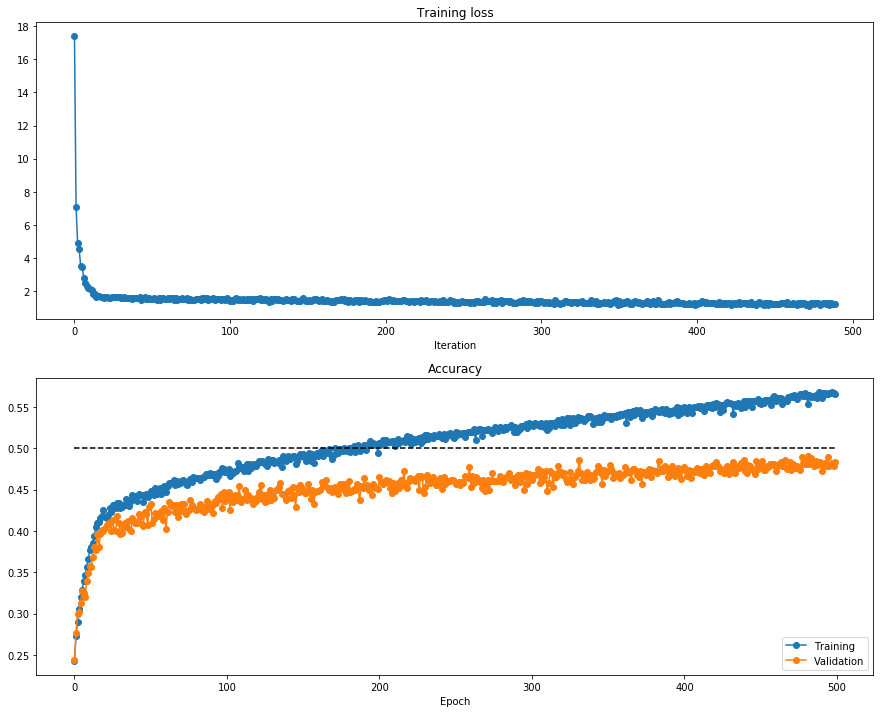

In [278]:
# Plot the learning curves
plt.subplot(2, 1, 1)
plt.title('Training loss')
loss_hist_ = loss_hist[1::100] # sparse the curve a bit
plt.plot(loss_hist_, '-o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(train_acc_hist, '-o', label='Training')
plt.plot(val_acc_hist, '-o', label='Validation')
plt.plot([0.5] * len(val_acc_hist), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

## Different Optimizers
There are several more advanced optimizers than vanilla SGD, you will implement three more sophisticated and widely-used methods in this section. Please complete the TODOs in the optim.py under lib directory.

## SGD + Momentum
The update rule of SGD plus momentum is as shown below: <br\ >
\begin{equation}
v_t: velocity \\
\gamma: momentum \\
\eta: learning\ rate \\
v_t = \gamma v_{t-1} + \eta \nabla_{\theta}J(\theta) \\
\theta = \theta - v_t
\end{equation}
Complete the SGDM() function in optim.py

In [102]:
# SGD with momentum
model = TinyNet()
loss_f = cross_entropy()
optimizer = SGD(model.net, 1e-4)

In [103]:
# Test the implementation of SGD with Momentum
N, D = 4, 5
test_sgd = sequential(fc(N, D, name="sgd_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

test_sgd.layers[0].params = {"sgd_fc_w": w}
test_sgd.layers[0].grads = {"sgd_fc_w": dw}

test_sgd_momentum = SGDM(test_sgd, 1e-3, 0.9)
test_sgd_momentum.velocity = {"sgd_fc_w": v}
test_sgd_momentum.step()

updated_w = test_sgd.layers[0].params["sgd_fc_w"]
velocity = test_sgd_momentum.velocity["sgd_fc_w"]

expected_updated_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print 'updated_w error: ', rel_error(updated_w, expected_updated_w)
print 'velocity error: ', rel_error(expected_velocity, velocity)

updated_w error:  1.0
velocity error:  0.0011111111111110914


Run the following code block to train a multi-layer fully connected network with both SGD and SGD plus Momentum. The network trained with SGDM optimizer should converge faster.


Training with SGD plus Momentum...
(Iteration 1 / 24500) loss: 2.76833163468
(Iteration 101 / 24500) loss: 1.86569583056
(Iteration 201 / 24500) loss: 1.81370618422
(Iteration 301 / 24500) loss: 1.68167466995
(Iteration 401 / 24500) loss: 1.55870864789
(Epoch 1 / 50) Training Accuracy: 0.42187755102, Validation Accuracy: 0.417
(Iteration 501 / 24500) loss: 1.61047051756
(Iteration 601 / 24500) loss: 1.61551053884
(Iteration 701 / 24500) loss: 1.57243605848
(Iteration 801 / 24500) loss: 1.49060101957
(Iteration 901 / 24500) loss: 1.57343542991
(Epoch 2 / 50) Training Accuracy: 0.447816326531, Validation Accuracy: 0.46
(Iteration 1001 / 24500) loss: 1.7657684366
(Iteration 1101 / 24500) loss: 1.77470250709
(Iteration 1201 / 24500) loss: 1.66451431381
(Iteration 1301 / 24500) loss: 1.53509768946
(Iteration 1401 / 24500) loss: 1.3895658229
(Epoch 3 / 50) Training Accuracy: 0.489346938776, Validation Accuracy: 0.483
(Iteration 1501 / 24500) loss: 1.47396923566
(Iteration 1601 / 24500) loss

(Iteration 13501 / 24500) loss: 1.13719347771
(Iteration 13601 / 24500) loss: 1.25787659322
(Iteration 13701 / 24500) loss: 1.10498470235
(Epoch 28 / 50) Training Accuracy: 0.618469387755, Validation Accuracy: 0.487
(Iteration 13801 / 24500) loss: 1.01606330312
(Iteration 13901 / 24500) loss: 1.235859264
(Iteration 14001 / 24500) loss: 1.10706009022
(Iteration 14101 / 24500) loss: 1.0813459386
(Iteration 14201 / 24500) loss: 1.01269891454
(Epoch 29 / 50) Training Accuracy: 0.621591836735, Validation Accuracy: 0.505
(Iteration 14301 / 24500) loss: 1.15454497868
(Iteration 14401 / 24500) loss: 1.02694388454
(Iteration 14501 / 24500) loss: 0.961240302087
(Iteration 14601 / 24500) loss: 1.16641373701
(Epoch 30 / 50) Training Accuracy: 0.627530612245, Validation Accuracy: 0.485
(Iteration 14701 / 24500) loss: 1.35750043451
(Iteration 14801 / 24500) loss: 1.04378477232
(Iteration 14901 / 24500) loss: 1.1160837684
(Iteration 15001 / 24500) loss: 1.28399232569
(Iteration 15101 / 24500) loss: 0

/home/taotaochen/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


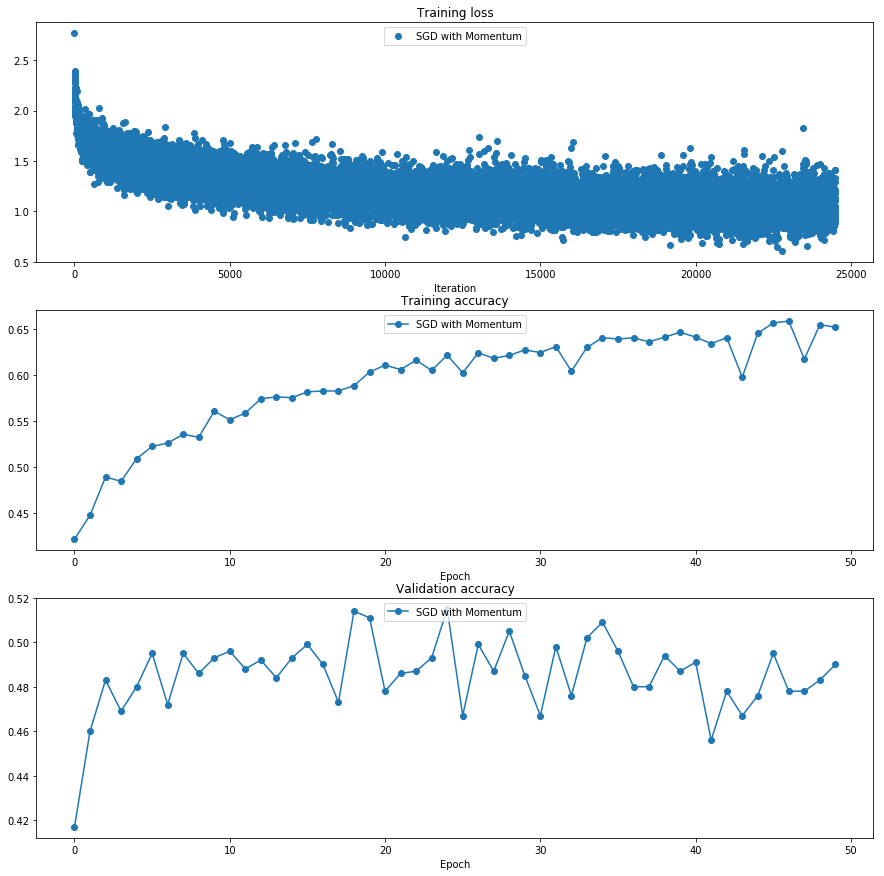

In [118]:
# Arrange a small data
num_train = 49000
small_data_dict = {
    "data_train": (data["data_train"][:num_train], data["labels_train"][:num_train]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

# model_sgd      = FullyConnectedNetwork()
model_sgdm     = FullyConnectedNetwork()
# loss_f_sgd     = cross_entropy()
loss_f_sgdm    = cross_entropy()
# optimizer_sgd  = SGD(model_sgd.net, 1e-2)
optimizer_sgdm = SGDM(model_sgdm.net, 1e-2, 0.9)

# print "Training with Vanilla SGD..."
# results_sgd = train_net(small_data_dict, model_sgd, loss_f_sgd, optimizer_sgd, batch_size=100, 
#                         max_epochs=5, show_every=100, verbose=True)

print "\nTraining with SGD plus Momentum..."
results_sgdm = train_net(small_data_dict, model_sgdm, loss_f_sgdm, optimizer_sgdm, batch_size=100, 
                         max_epochs=50, show_every=100, verbose=True)

# opt_params_sgd,  loss_hist_sgd,  train_acc_hist_sgd,  val_acc_hist_sgd  = results_sgd
opt_params_sgdm, loss_hist_sgdm, train_acc_hist_sgdm, val_acc_hist_sgdm = results_sgdm

# plt.subplot(3, 1, 1)
# plt.title('Training loss')
# plt.xlabel('Iteration')

# plt.subplot(3, 1, 2)
# plt.title('Training accuracy')
# plt.xlabel('Epoch')

# plt.subplot(3, 1, 3)
# plt.title('Validation accuracy')
# plt.xlabel('Epoch')

# plt.subplot(3, 1, 1)
# plt.plot(loss_hist_sgd, 'o', label="Vanilla SGD")
# plt.subplot(3, 1, 2)
# plt.plot(train_acc_hist_sgd, '-o', label="Vanilla SGD")
# plt.subplot(3, 1, 3)
# plt.plot(val_acc_hist_sgd, '-o', label="Vanilla SGD")
         
# plt.subplot(3, 1, 1)
# plt.plot(loss_hist_sgdm, 'o', label="SGD with Momentum")
# plt.subplot(3, 1, 2)
# plt.plot(train_acc_hist_sgdm, '-o', label="SGD with Momentum")
# plt.subplot(3, 1, 3)
# plt.plot(val_acc_hist_sgdm, '-o', label="SGD with Momentum")
  
# for i in [1, 2, 3]:
#   plt.subplot(3, 1, i)
#   plt.legend(loc='upper center', ncol=4)
# plt.gcf().set_size_inches(15, 15)
# plt.show()

In [119]:
for i in range(1, 7):
    np.savetxt('sgdm_params/fc'+str(i)+'_w.txt', opt_params_sgdm['fc'+str(i)+'_w'], delimiter=",")
    np.savetxt('sgdm_params/fc'+str(i)+'_b.txt', opt_params_sgdm['fc'+str(i)+'_b'], delimiter=",")

predictions = model_sgdm.forward(small_data_dict["data_test"][0][0:1000])
prediction_loss = loss_f_sgdm.forward(predictions, small_data_dict["data_test"][1][0:1000])
np.savetxt('predictions_output.txt', predictions, delimiter=" ")
print prediction_loss

1.5979093711317163


## RMSProp
The update rule of RMSProp is as shown below: <br\ >
\begin{equation}
\gamma: decay\ rate \\
\epsilon: small\ number \\
g_t^2: squared\ gradients \\
\eta: learning\ rate \\
E[g^2]_t: decaying\ average\ of\ past\ squared\ gradients\ at\ update\ step\ t \\
E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2 \\
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t+\epsilon}}
\end{equation}
Complete the RMSProp() function in optim.py

In [ ]:
# Test RMSProp implementation; you should see errors less than 1e-7
N, D = 4, 5
test_rms = sequential(fc(N, D, name="rms_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

test_rms.layers[0].params = {"rms_fc_w": w}
test_rms.layers[0].grads = {"rms_fc_w": dw}

opt_rms = RMSProp(test_rms, 1e-2, 0.99)
opt_rms.cache = {"rms_fc_w": cache}
opt_rms.step()

updated_w = test_rms.layers[0].params["rms_fc_w"]
cache = opt_rms.cache["rms_fc_w"]

expected_updated_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

print 'updated_w error: ', rel_error(expected_updated_w, updated_w)
print 'cache error: ', rel_error(expected_cache, opt_rms.cache["rms_fc_w"])

## Adam
The update rule of Adam is as shown below: <br\ >
\begin{equation}
g_t: gradients\ at\ update\ step\ t \\
m_t = \beta_1m_{t-1} + (1-\beta_1)g_t \\
v_t = \beta_2v_{t-1} + (1-\beta_1)g_t^2 \\
\hat{m_t}: bias\ corrected\ m_t \\
\hat{v_t}: bias\ corrected\ v_t \\
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v_t}}+\epsilon}
\end{equation}
Complete the Adam() function in optim.py

In [ ]:
# Test Adam implementation; you should see errors around 1e-7 or less
N, D = 4, 5
test_adam = sequential(fc(N, D, name="adam_fc"))

w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

test_adam.layers[0].params = {"adam_fc_w": w}
test_adam.layers[0].grads = {"adam_fc_w": dw}

opt_adam = Adam(test_adam, 1e-2, 0.9, 0.999, t=5)
opt_adam.mt = {"adam_fc_w": m}
opt_adam.vt = {"adam_fc_w": v}
opt_adam.step()

updated_w = test_adam.layers[0].params["adam_fc_w"]
mt = opt_adam.mt["adam_fc_w"]
vt = opt_adam.vt["adam_fc_w"]

expected_updated_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

print 'updated_w error: ', rel_error(expected_updated_w, updated_w)
print 'mt error: ', rel_error(expected_m, mt)
print 'vt error: ', rel_error(expected_v, vt)

## Comparing the optimizers
Run the following code block to compare the plotted results among all the above optimizers

In [ ]:
model_rms      = FullyConnectedNetwork()
model_adam     = FullyConnectedNetwork()
loss_f_rms     = cross_entropy()
loss_f_adam    = cross_entropy()
optimizer_rms  = RMSProp(model_rms.net, 5e-4)
optimizer_adam = Adam(model_adam.net, 5e-4)

print "Training with RMSProp..."
results_rms = train_net(small_data_dict, model_rms, loss_f_rms, optimizer_rms, batch_size=100, 
                        max_epochs=5, show_every=100, verbose=True)

print "\nTraining with Adam..."
results_adam = train_net(small_data_dict, model_adam, loss_f_adam, optimizer_adam, batch_size=100, 
                         max_epochs=5, show_every=100, verbose=True)

opt_params_rms,  loss_hist_rms,  train_acc_hist_rms,  val_acc_hist_rms  = results_rms
opt_params_adam, loss_hist_adam, train_acc_hist_adam, val_acc_hist_adam = results_adam

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgd, 'o', label="Vanilla SGD")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgd, '-o', label="Vanilla SGD")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgd, '-o', label="Vanilla SGD")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_sgdm, 'o', label="SGD with Momentum")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_sgdm, '-o', label="SGD with Momentum")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_sgdm, '-o', label="SGD with Momentum")

plt.subplot(3, 1, 1)
plt.plot(loss_hist_rms, 'o', label="RMSProp")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_rms, '-o', label="RMSProp")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_rms, '-o', label="RMSProp")
         
plt.subplot(3, 1, 1)
plt.plot(loss_hist_adam, 'o', label="Adam")
plt.subplot(3, 1, 2)
plt.plot(train_acc_hist_adam, '-o', label="Adam")
plt.subplot(3, 1, 3)
plt.plot(val_acc_hist_adam, '-o', label="Adam")
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

## Training a Network with Dropout
Run the following code blocks to compare the results with and without dropout

In [ ]:
# Train two identical nets, one with dropout and one without
num_train = 500
data_dict_500 = {
    "data_train": (data["data_train"][:num_train], data["labels_train"][:num_train]),
    "data_val": (data["data_val"], data["labels_val"]),
    "data_test": (data["data_test"], data["labels_test"])
}

solvers = {}
dropout_ps = [0, 0.25]  # you can try some dropout prob yourself

results_dict = {}
for dropout_p in dropout_ps:
    results_dict[dropout_p] = {}

for dropout_p in dropout_ps:
    print "Dropout =", dropout_p
    model = DropoutNetTest(dropout_p=dropout_p)
    loss_f = cross_entropy()
    optimizer = SGDM(model.net, 1e-4)
    results = train_net(data_dict_500, model, loss_f, optimizer, batch_size=100, 
                        max_epochs=20, show_every=100, verbose=True)
    opt_params, loss_hist, train_acc_hist, val_acc_hist = results
    results_dict[dropout_p] = {
        "opt_params": opt_params, 
        "loss_hist": loss_hist, 
        "train_acc_hist": train_acc_hist, 
        "val_acc_hist": val_acc_hist
    }

In [ ]:
# Plot train and validation accuracies of the two models
train_accs = []
val_accs = []
for dropout_p in dropout_ps:
    curr_dict = results_dict[dropout_p]
    train_accs.append(curr_dict["train_acc_hist"][-1])
    val_accs.append(curr_dict["val_acc_hist"][-1])

plt.subplot(3, 1, 1)
for dropout_p in dropout_ps:
    curr_dict = results_dict[dropout_p]
    plt.plot(curr_dict["train_acc_hist"], 'o', label='%.2f dropout' % dropout_p)
plt.title('Train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')
  
plt.subplot(3, 1, 2)
for dropout_p in dropout_ps:
    curr_dict = results_dict[dropout_p]
    plt.plot(curr_dict["val_acc_hist"], 'o', label='%.2f dropout' % dropout_p)
plt.title('Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(ncol=2, loc='lower right')

plt.gcf().set_size_inches(15, 15)
plt.show()

### Inline Question: Describe what you observe from the above results and graphs
#### Ans:

## Plot the Activation Functions
In each of the activation function, use the given lambda function template to plot their corresponding curves.

In [ ]:
left, right = -10, 10
X  = np.linspace(left, right, 100)
XS = np.linspace(-5, 5, 10)
lw = 4
alpha = 0.1
elu_alpha = 0.5
selu_alpha = 1.6732
selu_scale = 1.0507

#########################
####### YOUR CODE #######
#########################
sigmoid = lambda x: x
leaky_relu = lambda x: x
relu = lambda x: x
elu = lambda x: x
selu = lambda x: x
tanh = lambda x: x
#########################
### END OF YOUR CODE ####
#########################

activations = {
    "Sigmoid": sigmoid,
    "LeakyReLU": leaky_relu,
    "ReLU": relu,
    "ELU": elu,
    "SeLU": selu,
    "Tanh": tanh
}

# Ground Truth activations
GT_Act = {
    "Sigmoid": [0.00669285092428, 0.0200575365379, 0.0585369028744, 0.158869104881, 0.364576440742, 
                0.635423559258, 0.841130895119, 0.941463097126, 0.979942463462, 0.993307149076],
    "LeakyReLU": [-0.5, -0.388888888889, -0.277777777778, -0.166666666667, -0.0555555555556, 
                  0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "ReLU": [-0.0, -0.0, -0.0, -0.0, -0.0, 0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "ELU": [-0.4966310265, -0.489765962143, -0.468911737989, -0.405562198581, -0.213123289631, 
            0.555555555556, 1.66666666667, 2.77777777778, 3.88888888889, 5.0],
    "SeLU": [-1.74618571868, -1.72204772347, -1.64872296837, -1.42598202974, -0.749354802287, 
             0.583722222222, 1.75116666667, 2.91861111111, 4.08605555556, 5.2535],
    "Tanh": [-0.999909204263, -0.999162466631, -0.992297935288, -0.931109608668, -0.504672397722, 
             0.504672397722, 0.931109608668, 0.992297935288, 0.999162466631, 0.999909204263]
} 

for label in activations:
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(X, activations[label](X), color='darkorchid', lw=lw, label=label)
    assert rel_error(activations[label](XS), GT_Act[label]) < 1e-9, \
           "Your implementation of {} might be wrong".format(label)
    ax.legend(loc="lower right")
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title('{}'.format(label), fontsize=14)
    plt.xlabel(r"X")
    plt.ylabel(r"Y")
    plt.show()

# Phew! You're done for problem 1 now, but 3 more to go... LOL